In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,NaN,0,Contract,112.80,0,1,Check-Out,09/14/2017
1,Resort Hotel,0,161,2017,August,35,31,4,10,2,...,No Deposit,69.0,NaN,0,Transient,99.06,0,0,Check-Out,09/14/2017
2,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,NaN,0,Transient,153.57,0,3,Check-Out,09/12/2017
3,Resort Hotel,0,269,2017,August,34,24,4,13,2,...,No Deposit,40.0,NaN,0,Contract,84.80,0,2,Check-Out,09/10/2017
4,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,NaN,0,Transient-Party,204.27,0,1,Check-Out,09/10/2017


In [41]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
87391,City Hotel,1,300,2015,August,33,13,0,2,2,...,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17
87392,City Hotel,1,307,2015,August,34,20,0,2,2,...,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17
87393,City Hotel,1,314,2015,August,35,27,0,2,2,...,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17
87394,City Hotel,1,321,2015,September,36,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17
87395,City Hotel,1,321,2015,September,36,3,0,2,2,...,A,0,No Deposit,0,Transient-Party,62.8,0,0,Canceled,2014-10-17


In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [11]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [55]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [13]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,87396,87396,87396,86944,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371


In [15]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['August' 'July' 'June' 'May' 'April' 'March' 'February' 'January'
 'December' 'November' 'October' 'September']
meal
['HB' 'BB' 'SC' 'FB' 'Undefined']
country
['GBR' 'DEU' 'IRL' 'PRT' 'ESP' 'NLD' 'BEL' 'ITA' 'CN' 'FRA' 'ROU' 'JPN'
 'CHE' 'USA' 'BRA' 'CHN' 'AUT' 'DNK' 'SWE' 'LUX' 'ZAF' 'POL' 'SVK' 'TUR'
 'BGR' 'RUS' 'MAR' 'LBN' 'EST' 'ARG' 'CHL' 'HRV' 'AUS' 'FRO' 'PAK' 'MEX'
 'IRN' 'NOR' 'LTU' 'FIN' 'HUN' 'VNM' 'COL' 'ISR' 'CYP' 'CZE' 'AGO' 'TUN'
 'KOR' 'NZL' 'GEO' 'JOR' 'DZA' 'ETH' 'KWT' 'ECU' 'COM' 'MYS' 'PRY' 'GIB'
 'BLR' 'GRC' 'LAO' 'OMN' 'BHR' 'IDN' 'ISL' 'PHL' 'SLV' 'QAT' 'AZE' 'MOZ'
 'CAF' 'SLE' 'AND' 'CMR' 'IND' 'SRB' 'GAB' 'UKR' 'HKG' 'DJI' 'TJK' 'LBY'
 'SAU' 'KAZ' 'LVA' 'CIV' 'TWN' 'NGA' 'VEN' 'ARE' 'ARM' 'KNA' 'ATF' 'SVN'
 'PRI' 'PER' 'SGP' 'TGO' 'GHA' 'KEN' 'MLT' 'MDV' 'THA' 'SEN' 'SDN' 'KIR'
 'ZWE' 'UZB' 'CRI' 'MAC' 'BIH' 'CUB' 'CPV' 'PAN' 'URY' 'DOM' 'SUR' 'STP'
 'NCL' 'GTM' 'JEY' 'EGY' 'ABW' 'BHS' 'UMI' 'IRQ' 'MYT' '

In [17]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12192
company                           82138


In [19]:
df.drop(['agent','company'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [21]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [27]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939
mean,0.275895,80.193895,2016.211827,26.841636,15.817918,1.007407,2.628763,1.878524,0.139213,0.010835,0.039234,0.030228,0.176710,0.271846,0.753505,106.513917,0.083449,0.699467,2016-08-31 15:48:36.927960832
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446967,86.100506,0.686019,13.654503,8.834465,1.028764,2.043758,0.625864,0.456788,0.113593,0.194153,0.369576,1.717895,0.728090,10.041873,51.942742,0.280403,0.831842,NaN


In [25]:
df = df[df['adr']<5000]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86939 entries, 0 to 87395
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86939 non-null  object        
 1   is_canceled                     86939 non-null  int64         
 2   lead_time                       86939 non-null  int64         
 3   arrival_date_year               86939 non-null  int64         
 4   arrival_date_month              86939 non-null  object        
 5   arrival_date_week_number        86939 non-null  int64         
 6   arrival_date_day_of_month       86939 non-null  int64         
 7   stays_in_weekend_nights         86939 non-null  int64         
 8   stays_in_week_nights            86939 non-null  int64         
 9   adults                          86939 non-null  int64         
 10  children                        86939 non-null  float64       
 11  babies 

is_canceled
0    0.724105
1    0.275895
Name: proportion, dtype: float64


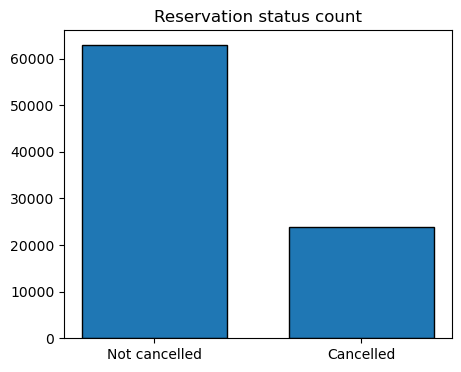

In [145]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled', 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.show()

In [35]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.762962
1    0.237038
Name: proportion, dtype: float64

In [43]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.699721
1    0.300279
Name: proportion, dtype: float64

In [45]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

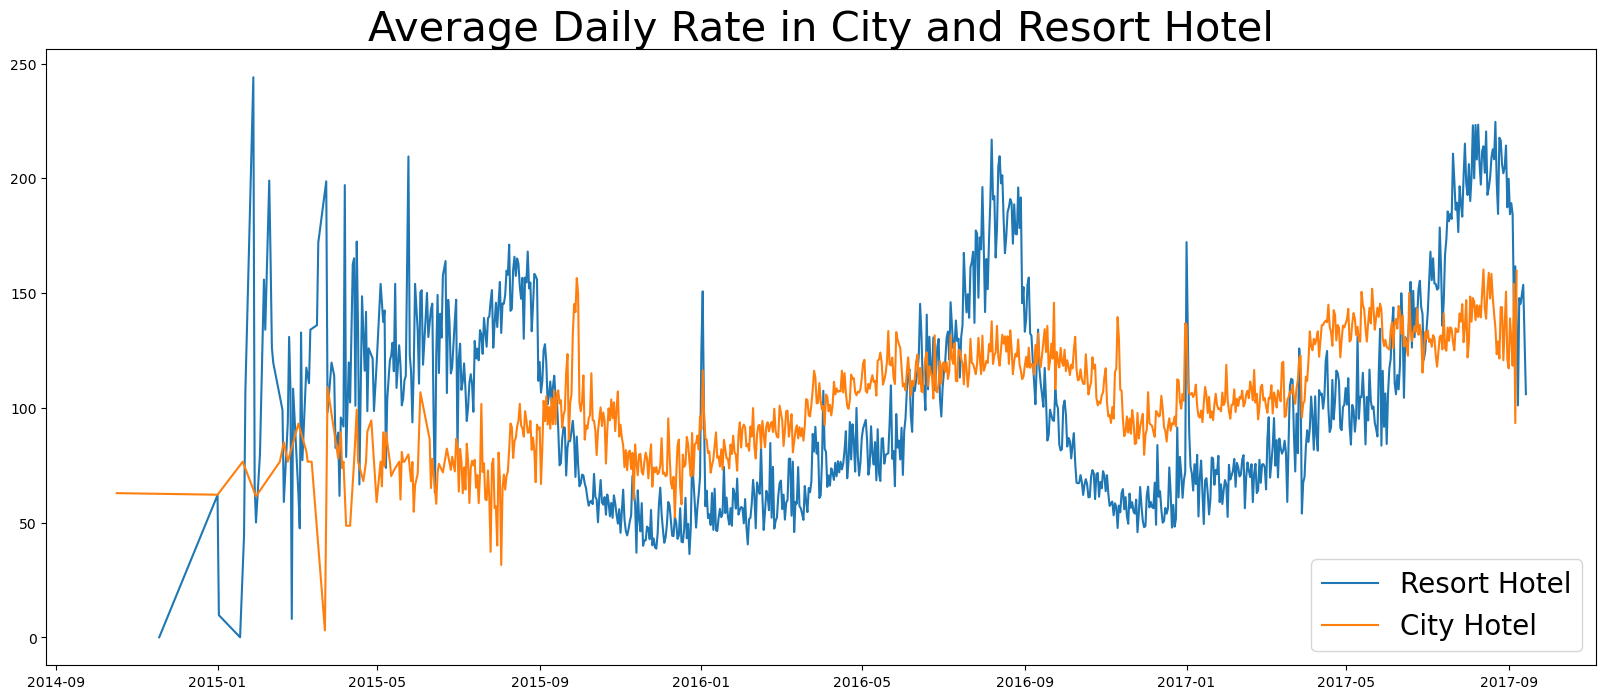

In [49]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel' , fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize= 20)
plt.show()

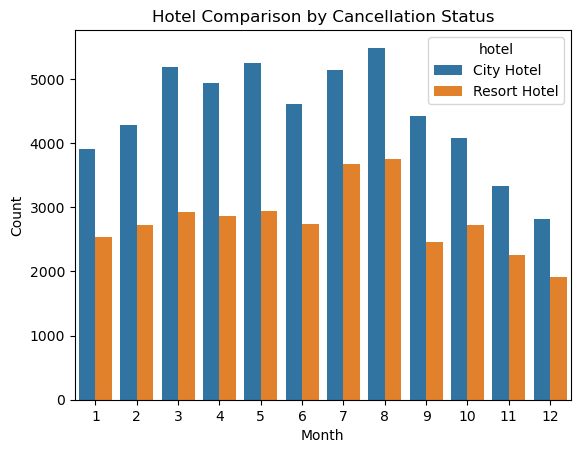

In [113]:
df['month'] = df['reservation_status_date'].dt.month
ax = sns.countplot(x='month', hue='hotel', data=df, hue_order=['City Hotel', 'Resort Hotel'])
plt.title('Hotel Comparison by Cancellation Status')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

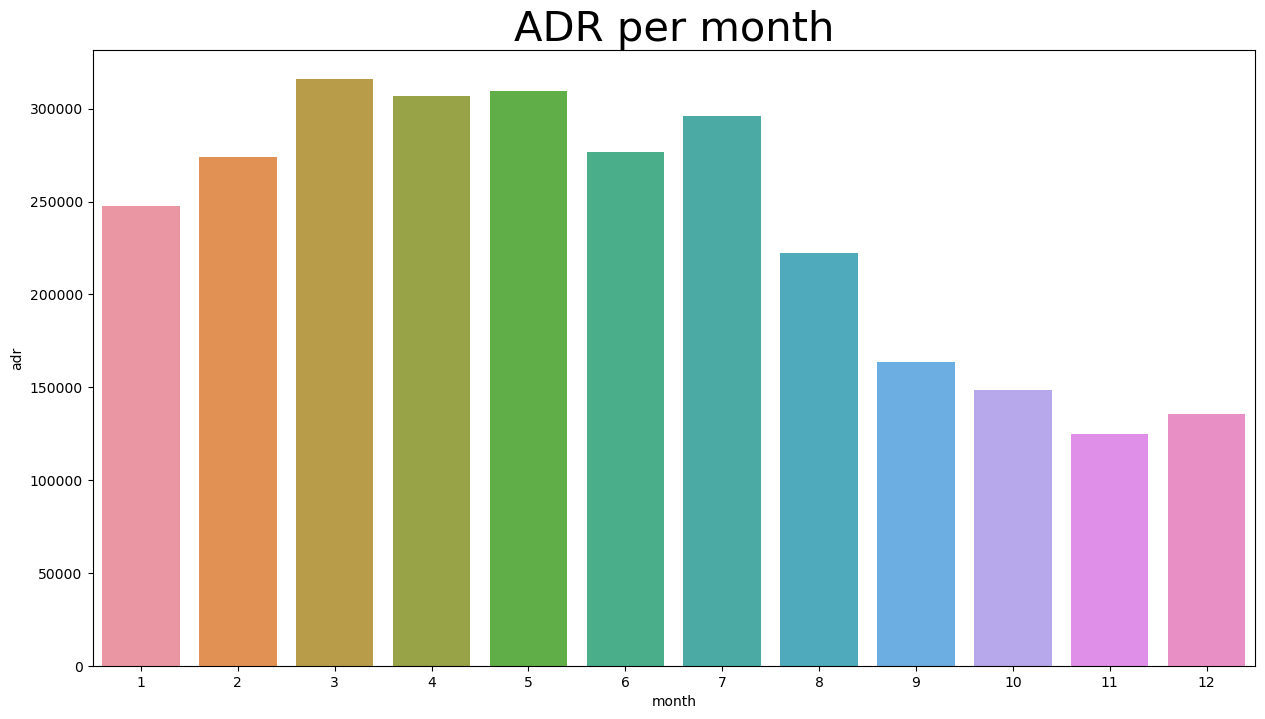

In [119]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
canceled_monthly_adr = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x='month', y='adr', data=canceled_monthly_adr)
plt.show()

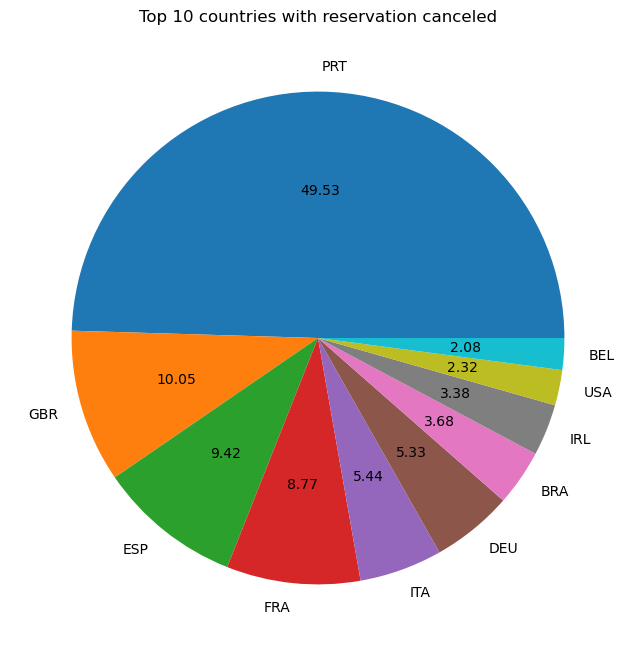

In [121]:
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [125]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.592864
Offline TA/TO    0.159376
Direct           0.133967
Groups           0.056787
Corporate        0.046366
Complementary    0.008029
Aviation         0.002611
Name: proportion, dtype: float64

In [127]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.760610
Offline TA/TO    0.085717
Direct           0.071834
Groups           0.055657
Corporate        0.020720
Complementary    0.003585
Aviation         0.001876
Name: proportion, dtype: float64

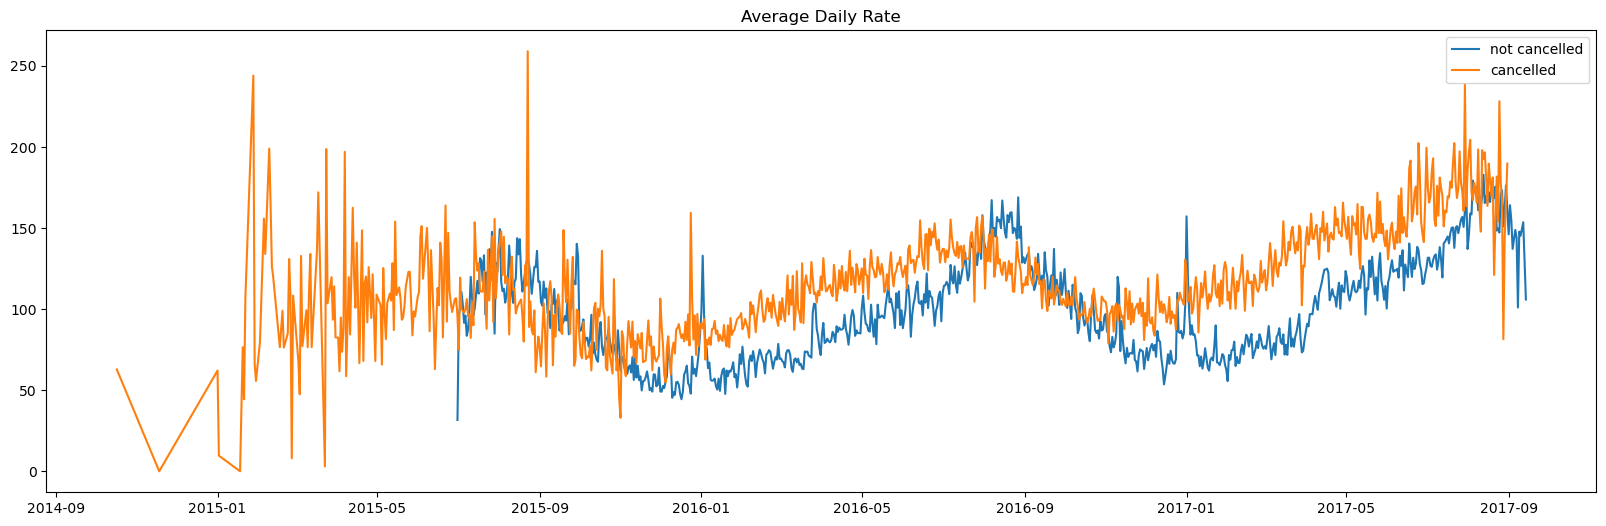

In [131]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date',inplace = True)
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace = True)
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()

In [137]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')& (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

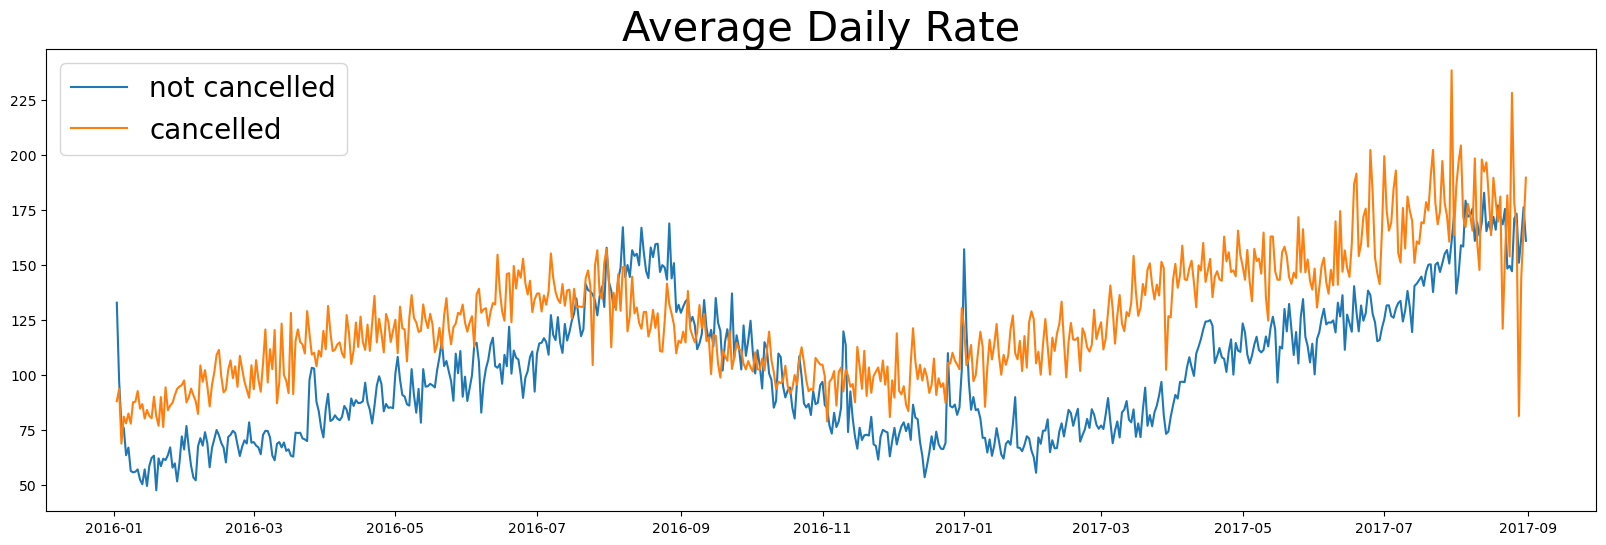

In [141]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize =30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label = 'cancelled')
plt.legend(fontsize =20)